<a href="https://colab.research.google.com/github/ohjisu320/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글폰트설정

In [1]:
# !apt-get -y install fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## read excel file with sheets

In [2]:
import pandas as pd
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name=None)

In [3]:
df_sheets = []
for sheet_name, df in df_OWG.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2월, <class 'pandas.core.frame.DataFrame'>
1월, <class 'pandas.core.frame.DataFrame'>
12월, <class 'pandas.core.frame.DataFrame'>


3

## 데이터 전처리

In [4]:
df_sheets[0].columns

Index([     '            ',        'Unnamed: 1', 2024-02-15 00:00:00,
       2024-02-14 00:00:00, 2024-02-13 00:00:00, 2024-02-07 00:00:00,
       2024-02-06 00:00:00, 2024-02-05 00:00:00, 2024-02-02 00:00:00,
       2024-02-01 00:00:00],
      dtype='object')

In [5]:
# column 이름 변환
for x in [0,1,2]:
  df_sheets[x].rename(columns={'            ': 'name'}, inplace=True)
  pass

df_sheets[2].rename(columns={'      ': 'name'}, inplace=True)

In [6]:
# 내 이름만 빼기
contents_list = []
for x in range(len(df_sheets)) :
  condition = 'name=="오지수"'
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
  contents_list.append(contents)
  pass


<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]


In [98]:
# 조사 제외
import re
text_list = []
for x in range(len(contents_list)) :
  text = ' '.join(contents_list[x])
  patterns = '(때문에 |말한다|위해서|한다| 통해 |하다|이를|이나|이다|있다|으로|있게|위해|되어|되고|되는|된다|까지|하지|같다|같은|같아|하여|할수|하고|하는이다|있는|의 |것|갓 | 간  |\\n|를 |\.|\, |로 |은 |을 |에 |수 | 수|이 |할 |나 |\(|\)|\-)|때'
  text_regex = re.sub(pattern=patterns,repl=' ',string=text)
  text_list.append(text_regex)
text_list

['regular expression Encoding 범주형 데이터 숫자형 데이터 변환하는 과정     과정 군집화 머신러닝 알고리즘 적용    컴퓨터가 데이터 더 잘 이해  처리    하기   필요    강화학습 reinforcement learning  문제와 정답 알려주지 않고 환경 던져 준 후 시행착오 통해 보상 최대화하는 방향  학습하는 방법     알파고가 강화학습 대표적인 예로 복잡한 환경에서 최적 결정 내리는 문제 해결     데이터 전처리 결측치 이상치 분석 적합한 형태 가공  정제하는 과정    잘못된 데이터가 포함  있으면 분석 결과 정확성 떨어질  있기  데이터 전처리 과정 필요   PDA Predictive Data Analysis  데이터 간 관계 학습한   토대 수식화 일반화해서 새로운 데이터 대해 예측하는 방식 데이터 분석    새로운 데이터 다음 상황 예측해서 비지니스 전략 수립하는 등 의사결정 내리기   사용   기대빈도수 expected frequencies  어떤 사건 일어날    예상  빈도수 의미   어떤 사건 발생 빈도수 확률 예측하기   구해진다   상관계수 correlation coefficient  두 연속형 변수간 상관관계 분석한 치   양 상관관계 띄는지 음 상관관계 띄는지 아니면 상관관계가 없는지 판별해서 변 간 관계 해석     산점도 scatter plot  2개 연속형 변수 이용해 점 찍어 만든 통계 그래프   연속형 변 간 상관관계 파악하거 데이터 분포 확인하기   사용  ',
 "pandas    index series dataframe index 추출해주는 메소드   행 식별해서 데이터 분석 시각화하기   사용   Series index 나타내고 value 하나 열 담아 나타내는 데이터타입   단일데이터 표 형식  담아 다른 Series와 연산 결측치 확인 이상치 확인 등 리스트보다 더 많 분석       자바스크립트   오브젝트 파이썬에서 dictionary와 유사한 데이터 타입  키와 밸류 값 

In [99]:
# 다 합치기(시트별 스트링)
text = ''.join(text_list)
text

"regular expression Encoding 범주형 데이터 숫자형 데이터 변환하는 과정     과정 군집화 머신러닝 알고리즘 적용    컴퓨터가 데이터 더 잘 이해  처리    하기   필요    강화학습 reinforcement learning  문제와 정답 알려주지 않고 환경 던져 준 후 시행착오 통해 보상 최대화하는 방향  학습하는 방법     알파고가 강화학습 대표적인 예로 복잡한 환경에서 최적 결정 내리는 문제 해결     데이터 전처리 결측치 이상치 분석 적합한 형태 가공  정제하는 과정    잘못된 데이터가 포함  있으면 분석 결과 정확성 떨어질  있기  데이터 전처리 과정 필요   PDA Predictive Data Analysis  데이터 간 관계 학습한   토대 수식화 일반화해서 새로운 데이터 대해 예측하는 방식 데이터 분석    새로운 데이터 다음 상황 예측해서 비지니스 전략 수립하는 등 의사결정 내리기   사용   기대빈도수 expected frequencies  어떤 사건 일어날    예상  빈도수 의미   어떤 사건 발생 빈도수 확률 예측하기   구해진다   상관계수 correlation coefficient  두 연속형 변수간 상관관계 분석한 치   양 상관관계 띄는지 음 상관관계 띄는지 아니면 상관관계가 없는지 판별해서 변 간 관계 해석     산점도 scatter plot  2개 연속형 변수 이용해 점 찍어 만든 통계 그래프   연속형 변 간 상관관계 파악하거 데이터 분포 확인하기   사용  pandas    index series dataframe index 추출해주는 메소드   행 식별해서 데이터 분석 시각화하기   사용   Series index 나타내고 value 하나 열 담아 나타내는 데이터타입   단일데이터 표 형식  담아 다른 Series와 연산 결측치 확인 이상치 확인 등 리스트보다 더 많 분석       자바스크립트   오브젝트 파이썬에서 dictionary와 유사한 데이터 타입  키와 밸류 값 묶음 형식 

In [100]:
text_split = text.split()
text_split[:2], len(text_split)

(['regular', 'expression'], 568)

In [101]:
from collections import Counter
text_split_count = Counter(text_split)
# text_split_count

In [102]:
series = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [103]:
# !pip install soynlp


## wordcloud 만들기

In [104]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

In [105]:
wordCloud.generate_from_frequencies(series)

In [106]:
wordCloud.words_

{'데이터': 1.0,
 '사용': 0.42857142857142855,
 '분석': 0.3333333333333333,
 '과정': 0.3333333333333333,
 '웹': 0.2857142857142857,
 '스타일': 0.23809523809523808,
 '안': 0.23809523809523808,
 '정보': 0.23809523809523808,
 '어떤': 0.19047619047619047,
 '형식': 0.19047619047619047,
 '상관관계': 0.19047619047619047,
 '형태': 0.19047619047619047,
 '간': 0.19047619047619047,
 '하는': 0.19047619047619047,
 '코드': 0.14285714285714285,
 '연속형': 0.14285714285714285,
 '값': 0.14285714285714285,
 '등': 0.14285714285714285,
 '컬럼': 0.14285714285714285,
 '목적': 0.14285714285714285,
 '다양한': 0.14285714285714285,
 'class': 0.14285714285714285,
 '파라미터': 0.14285714285714285,
 '명령어': 0.14285714285714285,
 '단위': 0.14285714285714285,
 '다른': 0.14285714285714285,
 'index': 0.14285714285714285,
 '기능': 0.14285714285714285,
 'value': 0.14285714285714285,
 '개별': 0.14285714285714285}

### 완성!

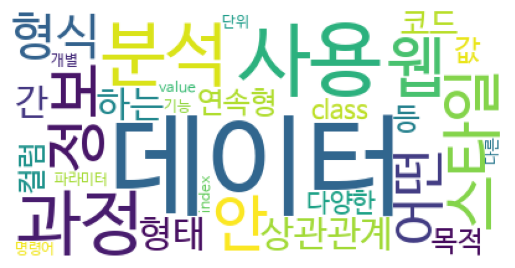

In [107]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()